In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

import racetrack
from mc import sample_episode, monte_carlo_control_eps_soft

In [3]:
env = gym.make('Racetrack-v0', track='test')


  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\sam24\.conda\envs\machine_learning\lib\site-packages\gymnasium\utils\passive_env_checker.py:218: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
C:\Users\sam24\.conda\envs\machine_learning\lib\site-packages\gymnasium\utils\passive_env_checker.py:242: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
Min return: -5: 100%|██████████| 1000/1000 [00:03<00:00, 273.18it/s]


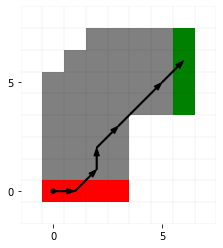

In [4]:
q, policy = monte_carlo_control_eps_soft(env, 1_000, eps=0.10, alpha=0.05)

state_ridxs, action_ridxs, returns = sample_episode(env, policy, render=True)
# sample_episode(env, policy, render=True)

In [5]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

def plot_results(env, q, policy):
    v = np.max(q, axis=1).reshape(env.observation_space.nvec)
    v_pos = np.mean(v, axis=(2, 3))

    unvisited_filter = np.where(v_pos == 1.0)
    v_pos[unvisited_filter] = np.nan

    plt.figure()
    plt.title("Value Function Averaged over Speeds")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.imshow(v_pos.T, origin='lower')
    plt.colorbar()

    a_star_ridxs = np.argmax(policy, axis=1).reshape(env.observation_space.nvec)
    a_stars = np.array(np.unravel_index(a_star_ridxs, env.action_space.nvec)) - env.max_accel
    a_stars_mean = np.mean(a_stars, axis=(-1, -2))
    a_stars_norm = (a_stars_mean.T - np.mean(a_stars_mean, axis=(1, 2))).T
    a_stars_norm[:, unvisited_filter[0], unvisited_filter[1]] = 0

    env.reset()
    axis = env.render()
    xs, ys = np.arange(env.observation_space.nvec[0]), np.arange(env.observation_space.nvec[1])
    a_star_x, a_star_y = a_stars_norm[0], a_stars_norm[1]
    axis.quiver(xs, ys, a_star_x.T, a_star_y.T)

    plt.title("Action Averaged Over Speeds")
    plt.xlabel("X")
    plt.ylabel("Y")

In [6]:
env = gym.make('Racetrack-v0', track='figure05-05-right')
q, policy = monte_carlo_control_eps_soft(env, 10000, eps=0.05, alpha=0.10)

Min return: -52: 100%|██████████| 10000/10000 [02:39<00:00, 62.82it/s]


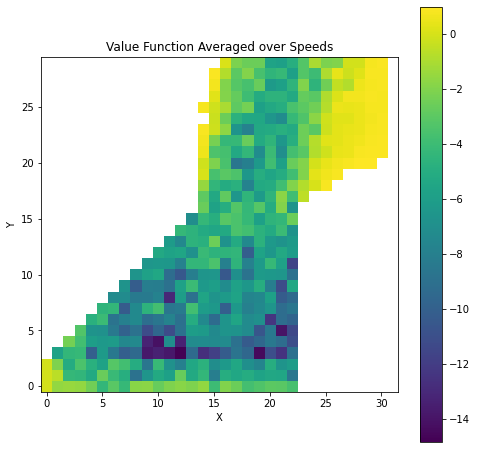

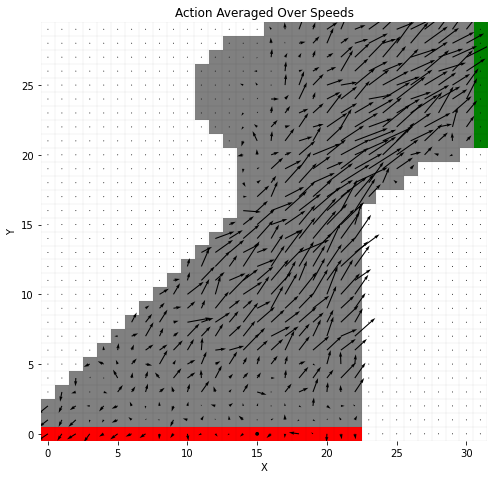

In [7]:
plot_results(env, q, policy)

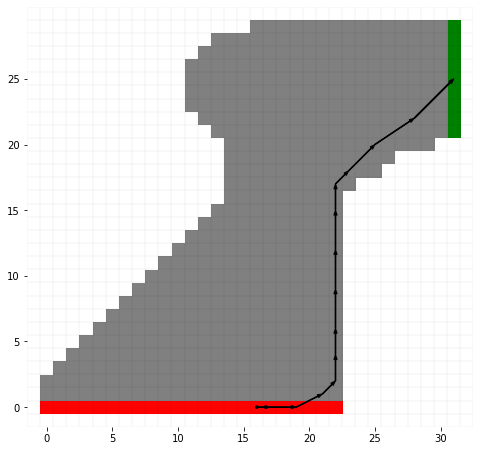

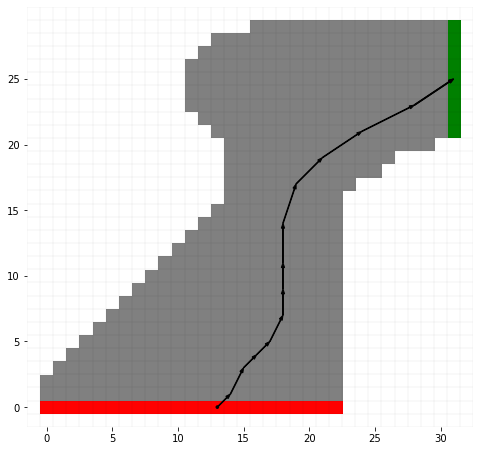

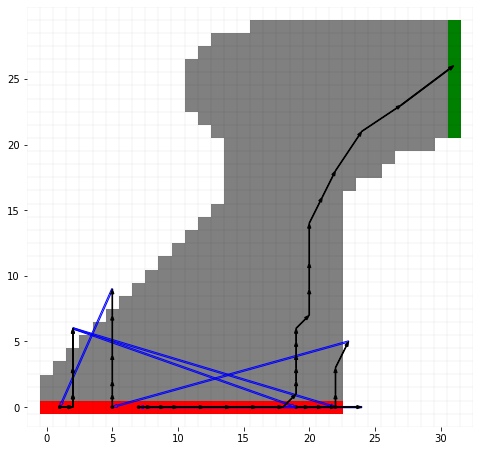

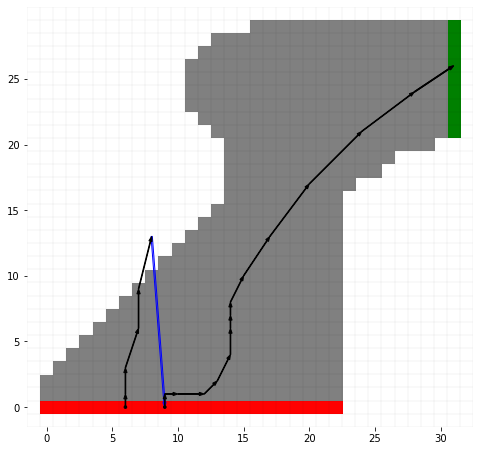

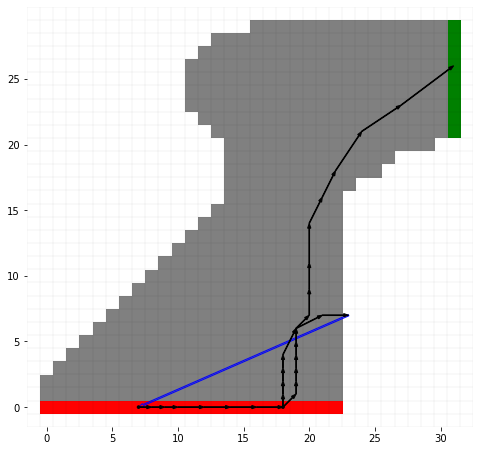

In [8]:
env0 = gym.make('Racetrack-v0', track='figure05-05-right', noisy=False)
for n in range(5):
    sample_episode(env0, policy, render=True)

Min return: -199: 100%|██████████| 1000/1000 [05:34<00:00,  2.99it/s]


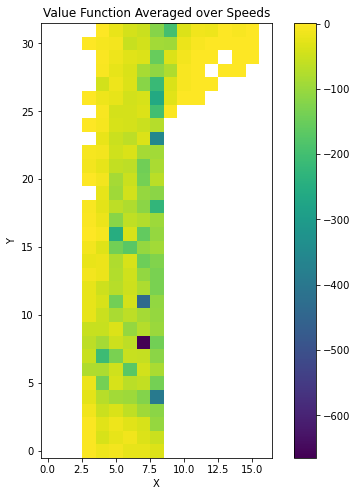

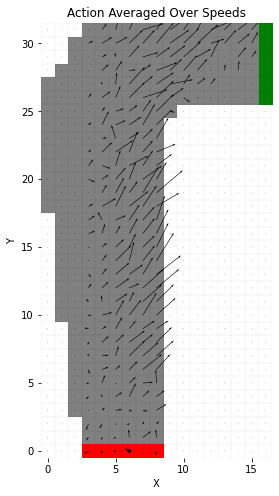

In [9]:
env = gym.make('Racetrack-v0', track='figure05-05-left')
q, policy = monte_carlo_control_eps_soft(env, 1000, eps=0.05, alpha=0.10)
plot_results(env, q, policy)

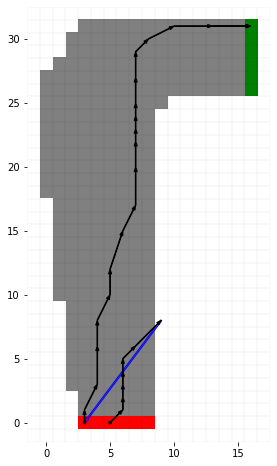

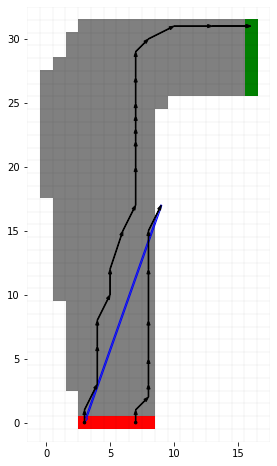

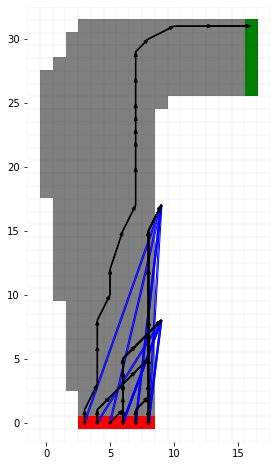

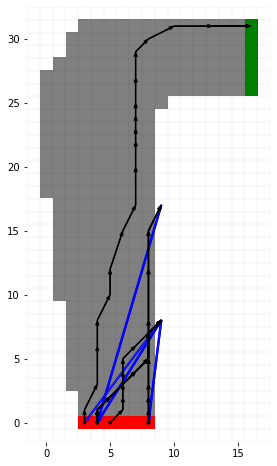

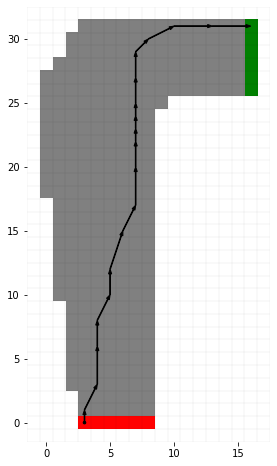

In [10]:
env = gym.make('Racetrack-v0', track='figure05-05-left', noisy=False)
for n in range(5):
    sample_episode(env, policy, render=True)